In [1]:
import json
import pprint
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import requests

response = requests.get("	https://datacenter.taichung.gov.tw/swagger/OpenData/9af00e84-473a-4f3d-99be-b875d8e86256")
content = response.content
json_tree = json.loads(content)
pprint.pprint(json_tree)

{'retCode': 1,
 'retVal': [{'act': 1,
             'ar': '永和街14號(東側)',
             'aren': 'No.14, Yonghe St. (East)',
             'bemp': '10',
             'lat': '24.148643',
             'lng': '120.544041',
             'mday': '20221017162340',
             'sarea': '大肚區',
             'sareaen': 'Dadu Dist',
             'sbi': '4',
             'sbi_detail': {'eyb': '0', 'yb2': '4'},
             'scity': '台中市',
             'scityen': 'Taichung City',
             'sna': 'YouBike2.0_大肚永和宮',
             'snaen': 'YouBike2.0_Dadu Yonghe Temple',
             'sno': '500619018',
             'tot': '14'},
            {'act': 1,
             'ar': '民和路二段222號(西南側)',
             'aren': 'No.222, Sec. 2, Minhe Rd. (Southwest)',
             'bemp': '7',
             'lat': '24.260769',
             'lng': '120.554265',
             'mday': '20221018170042',
             'sarea': '清水區',
             'sareaen': 'Qingshui Dist',
             'sbi': '8',
             'sbi_detail': {'

In [2]:
for bike_rent_records in json_tree['retVal']:
    leftRatio = float(bike_rent_records["sbi"]) / float(bike_rent_records["tot"]) * 100
    print("ID:{0}  Left:{2:0.1f}%  Name:{1}".format(bike_rent_records["sno"], bike_rent_records["aren"], leftRatio))

ID:500619018  Left:28.6%  Name:No.14, Yonghe St. (East)
ID:500612047  Left:53.3%  Name:No.222, Sec. 2, Minhe Rd. (Southwest)
ID:500619015  Left:0.0%  Name:No.700, Huashan Rd.
ID:500616025  Left:75.0%  Name:Sec. 2, Dazhi Rd. & Wubei Rd. Intersection (Northwest)
ID:500621030  Left:25.0%  Name:No.169, Zhongmei Rd. (Northwest)
ID:500622016  Left:70.0%  Name:No.504, Side Rd.
ID:500618013  Left:37.5%  Name:No.1460, Zhongshan Rd.
ID:500608161  Left:35.3%  Name:Sec. 1, Jianhe Rd. & Jianjun 1st St. Intersection (Southwest)
ID:500607112  Left:26.7%  Name:No.25, Sec. 5, Longfu Rd. (Opposite)
ID:500605067  Left:7.1%  Name:Qingdao Rd. / Shanxi Rd. (West)
ID:500602066  Left:10.0%  Name:No.26, Daxing St. (Southeast)
ID:500603032  Left:27.3%  Name:Gongyi Rd. & Jingcheng Rd. Intersection (Northwest)
ID:500616026  Left:50.0%  Name:Sec. 2, Dazhi Rd. & Wubei Rd. Intersection (Southwest)
ID:500612049  Left:20.0%  Name:No.118, Zhongyang Rd. (Southeast)
ID:500612048  Left:40.0%  Name:No.3, Xinyi Rd. (Southea

In [3]:
dataframe = pd.DataFrame(json_tree['retVal'])
dataframe['lat']=dataframe['lat'].astype(float)
dataframe['lng']=dataframe['lng'].astype(float)
dataframe['sbi']=dataframe['sbi'].astype(float)
w = dataframe['lat']
v = dataframe['lng']
k = dataframe['sbi']
dataframe

,scity,scityen,sna,sarea,ar,snaen,sareaen,aren,sno,tot,sbi,mday,lat,lng,bemp,act,sbi_detail
0,台中市,Taichung City,YouBike2.0_大肚永和宮,大肚區,永和街14號(東側),YouBike2.0_Dadu Yonghe Temple,Dadu Dist,"No.14, Yonghe St. (East)",500619018,14,4.0,20221017162340,24.148643,120.544041,10,1,"{'yb2': '4', 'eyb': '0'}"
1,台中市,Taichung City,YouBike2.0_仁愛民和路二段口,清水區,民和路二段222號(西南側),YouBike2.0_Renai Rd. / Minhe Rd.,Qingshui Dist,"No.222, Sec. 2, Minhe Rd. (Southwest)",500612047,15,8.0,20221018170042,24.260769,120.554265,7,1,"{'yb2': '8', 'eyb': '0'}"
2,台中市,Taichung City,YouBike2.0_臺中市立圖書館大肚瑞井分館,大肚區,華山路700號,YouBike2.0_Taichung Public Library Dadu Rueiji...,Dadu Dist,"No.700, Huashan Rd.",500619015,11,0.0,20221018161305,24.158400,120.568320,11,1,"{'yb2': '0', 'eyb': '0'}"
3,台中市,Taichung City,YouBike2.0_大智梧北路口(西北側),梧棲區,大智路二段/梧北路口(西北側),YouBike2.0_Dazhi Rd. / Wubei Rd. (Northwest),Wuqi Dist,"Sec. 2, Dazhi Rd. & Wubei Rd. Intersection (No...",500616025,12,9.0,20221017222713,24.261400,120.529770,3,1,"{'yb2': '8', 'eyb': '1'}"
4,台中市,Taichung City,YouBike2.0_后里國中,后里區,中眉路169號(西北側),YouBike2.0_Houli Junior High School,Houli Dist,"No.169, Zhongmei Rd. (Northwest)",500621030,20,5.0,20221018170213,24.308615,120.692915,15,1,"{'yb2': '5', 'eyb': '0'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,台中市,Taichung City,YouBike2.0_捷運九德站(興華街),烏日區,興華街/自強街口(東北側),YouBike2.0_TMRT Jiude Sta. (Xinghua St.),Wuri Dist,Xinghua St. & Ziqiang St. Intersection (Northe...,500617002,51,17.0,20221018171740,24.110220,120.634530,34,1,"{'yb2': '16', 'eyb': '1'}"
1202,台中市,Taichung City,YouBike2.0_捷運烏日站(平等路),烏日區,平等路/光日路口,YouBike2.0_TMRT Wuri Sta. (Pingdeng Rd.),Wuri Dist,Pingdeng Rd. & Guangri Rd. Intersection,500617003,20,8.0,20221018171314,24.108330,120.625060,12,1,"{'yb2': '8', 'eyb': '0'}"
1203,台中市,Taichung City,YouBike2.0_臺灣大道文心路口(西北側),西屯區,台灣大道三段/文心路二段口(西北側),YouBike2.0_Taiwan Blvd. / Wenxin Rd. (Northwest),Xitun Dist,Taiwan Blvd. / Wenxin Rd. (Northwest),500606006,30,24.0,20221018171739,24.163000,120.649450,6,1,"{'yb2': '24', 'eyb': '0'}"
1204,台中市,Taichung City,YouBike2.0_幸福兒童公園,西屯區,櫻城一街85號(東南側),YouBike2.0_Xingfu Children's Park,Xitun Dist,"No. 85, Yingcheng 1st St. (Southeast)",500606009,10,9.0,20221018171414,24.172330,120.652110,1,1,"{'yb2': '8', 'eyb': '1'}"


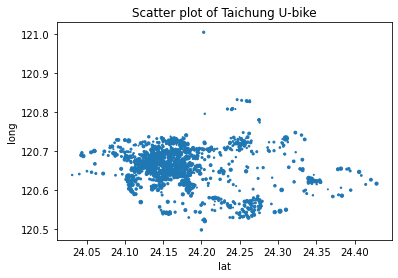

In [4]:
plt.scatter(w, v, k)
plt.title('Scatter plot of Taichung U-bike')
plt.xlabel('lat')
plt.ylabel('long')
plt.savefig('DEDA_410707007_HW2_Scraping with Taichung YouBike dataset')
plt.show()

In [6]:
import folium
from folium.plugins import MarkerCluster
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

u_bike = folium.Map(location= [24.136807, 120.684875], zoom_start=13 )


for i in range(0,1202):
    pop_text=str(dataframe['sarea'][i]) + '</br>'             '場站名稱: ' +str(dataframe['sna'][i]) + '</br>'             '地址: ' +str(dataframe['ar'][i]) + '</br>'             '總停車格: ' +str(dataframe['tot'][i]) + '</br>'             '目前車輛數量: ' +str(int(dataframe['sbi'][i])) + '</br>'             '可還車位數: ' +str(dataframe['bemp'][i]) + '</br>'             '暫停狀態: ' +str(dataframe['act'][i]) + '</br>'             '資料更新時間: ' +str(datetime.strptime(str(dataframe['mday'][i]), '%Y%m%d%H%M%S'))  
    if int(dataframe['act'][i])==0:
        folium.Marker([dataframe['lat'][i], dataframe['lng'][i]], icon = folium.Icon(icon='wrench', color = 'black'),popup = folium.Popup(pop_text, max_width=1000)).add_to(u_bike)
    elif int(dataframe['sbi'][i])==0:
        folium.Marker([dataframe['lat'][i], dataframe['lng'][i]], icon = folium.Icon(icon='remove', color = 'darkpurple'),popup = folium.Popup(pop_text, max_width=1000)).add_to(u_bike)
    elif int(dataframe['bemp'][i])==0:
        folium.Marker([dataframe['lat'][i], dataframe['lng'][i]], icon = folium.Icon(icon='remove-sign', color = 'cadetblue'),popup = folium.Popup(pop_text, max_width=1000)).add_to(u_bike)
    else :
        folium.Marker([dataframe['lat'][i], dataframe['lng'][i]], icon = folium.Icon(icon='heart', color = 'beige'), popup = folium.Popup(pop_text, max_width=1000)).add_to(u_bike)

u_bike.save("DEDA_410707007_HW2_Scraping with Taichung YouBike dataset.html")
u_bike